**Actividad 2.1 Regresión Lineal**

In [43]:
# Importación de librerias 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('PortoPortugal_50.csv')

In [45]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14432 entries, 0 to 14431
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    14432 non-null  int64  
 1   id                                            14432 non-null  int64  
 2   scrape_id                                     14432 non-null  int64  
 3   last_scraped                                  14432 non-null  object 
 4   source                                        14432 non-null  object 
 5   host_id                                       14432 non-null  int64  
 6   host_since                                    14432 non-null  object 
 7   host_response_time                            11971 non-null  object 
 8   host_response_rate                            11971 non-null  float64
 9   host_acceptance_rate                          12736 non-null 

In [46]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
Unnamed: 0                                         0
id                                                 0
scrape_id                                          0
last_scraped                                       0
source                                             0
host_id                                            0
host_since                                         0
host_response_time                              2461
host_response_rate                              2461
host_acceptance_rate                            1696
host_is_superhost                                582
host_listings_count                                0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type          

In [47]:
df_clean = df.drop(['license', 'last_scraped', 'source', 'host_since', 'host_response_time', 
                   'host_identity_verified', 'bathrooms_text', 'first_review', 'last_review'], axis=1)

In [48]:
df_clean['price'] = df_clean['price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/nm/538b56350957x8_x2f8xz2gc0000gn/T/ipykernel_16346/712866945.py:1: SyntaxWarning: invalid escape sequence '\$'
  df_clean['price'] = df_clean['price'].replace('[\$,]', '', regex=True).astype(float)


In [49]:
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df_clean[~((df_clean['price'] < (Q1 - 1.5 * IQR)) | (df_clean['price'] > (Q3 + 1.5 * IQR)))]

In [50]:
for col in ['host_response_rate', 'host_acceptance_rate']:
    if df_clean[col].dtype == object:
        df_clean[col] = df_clean[col].str.replace('%', '').astype(float) / 100

In [51]:
# Verificar tipos de habitación únicos

print("Tipos de habitación disponibles:")
print(df_clean['room_type'].unique())

Tipos de habitación disponibles:
['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


In [52]:
# Seleccionar los 4 tipos principales de habitación

top_4_room_types = df_clean['room_type'].value_counts().nlargest(4).index.tolist()
print("Top 4 tipos de habitación:", top_4_room_types)

Top 4 tipos de habitación: ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']


**DF sobre tipos de cuarto**

In [53]:
df["room_type"].value_counts()

room_type
Entire home/apt    11614
Private room        2436
Shared room          265
Hotel room           117
Name: count, dtype: int64

In [54]:
entire_home=df[df["room_type"]=="Entire home/apt"]
private_room=df[df["room_type"]=="Private room"]
shared_room=df[df["room_type"]=="Shared room"]
hotel_room=df[df["room_type"]=="Hotel room"]


In [55]:
#Eliminar columnas de tipo string
entire_home_num=entire_home.select_dtypes(include=['float64', 'int64','float','int'])



#Mapa de calor

Corr_factors=entire_home_num.corr()
Corr_factors_abosluto=abs(Corr_factors)
corr=abs(entire_home_num.corr())

Corr_factors_abosluto

,Unnamed: 0,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Unnamed: 0,1.000000,0.923257,NaN,0.506012,0.017118,0.048813,0.167668,0.032247,0.011361,0.073877,...,0.107146,0.126053,0.122044,0.093305,0.122868,0.193394,0.192871,0.157381,0.023728,0.153077
id,0.923257,1.000000,NaN,0.443844,0.013556,0.033666,0.146863,0.037110,0.012718,0.045944,...,0.097437,0.113661,0.114569,0.109564,0.121299,0.174950,0.174299,0.144843,0.023683,0.131353
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.506012,0.443844,NaN,1.000000,0.016926,0.024422,0.157926,0.024893,0.034667,0.082280,...,0.108006,0.120141,0.127001,0.090813,0.105966,0.229778,0.235531,0.097259,0.000757,0.103991
host_response_rate,0.017118,0.013556,NaN,0.016926,1.000000,0.455341,0.027926,0.035710,0.031505,0.027417,...,0.055108,0.046358,0.066997,0.049522,0.052606,0.058616,0.059165,0.039404,0.002065,0.114240
host_acceptance_rate,0.048813,0.033666,NaN,0.024422,0.455341,1.000000,0.071713,0.058561,0.006256,0.045993,...,0.027268,0.022705,0.042340,0.059189,0.046854,0.089076,0.090857,0.047054,0.020461,0.175773
host_listings_count,0.167668,0.146863,NaN,0.157926,0.027926,0.071713,1.000000,0.001111,0.022366,0.024437,...,0.080003,0.109800,0.090043,0.048813,0.098299,0.658767,0.658604,0.518265,0.001613,0.029703
latitude,0.032247,0.037110,NaN,0.024893,0.035710,0.058561,0.001111,1.000000,0.665608,0.010174,...,0.024060,0.007588,0.006894,0.020185,0.032276,0.018846,0.019976,0.000764,0.007233,0.053877
longitude,0.011361,0.012718,NaN,0.034667,0.031505,0.006256,0.022366,0.665608,1.000000,0.067678,...,0.032998,0.006633,0.013163,0.034423,0.031804,0.005184,0.005016,0.006023,0.004420,0.007401
accommodates,0.073877,0.045944,NaN,0.082280,0.027417,0.045993,0.024437,0.010174,0.067678,1.000000,...,0.019123,0.011023,0.021786,0.066855,0.014461,0.049584,0.047333,0.070568,0.010212,0.117655


<Axes: >

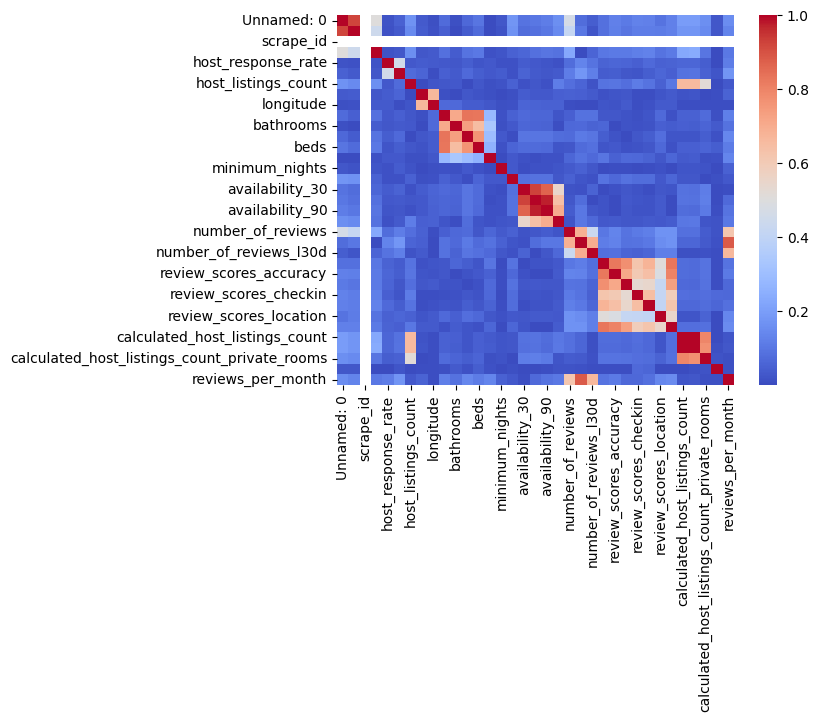

In [56]:
Heat_map=sns.heatmap(corr, cmap="coolwarm")
Heat_map

In [63]:
# Declaramos las variables dependientes e independientes para la regresión lineal
data = entire_home[['review_scores_location', 'review_scores_communication', 'review_scores_cleanliness']]

# Eliminamos las filas con valores nulos
data = data.dropna()

# Separamos nuevamente las variables
Vars_Indep = data[['review_scores_location', 'review_scores_communication']]
Var_Dep = data['review_scores_cleanliness']

# Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Corroboramos cuál es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación (R²):", coef_Deter)

# Corroboramos cuál es el coeficiente de correlación de nuestro modelo
import numpy as np
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación (R):", coef_Correl)


Coeficientes: [0.27727164 0.52822431]
Intercepto: 0.8853378409688455
Coeficiente de determinación (R²): 0.34313189349655737
Coeficiente de correlación (R): 0.5857746098087193


In [64]:
#Eliminar columnas de tipo string
private_room_num=private_room.select_dtypes(include=['float64', 'int64','float','int'])
filtro=private_room[["host_acceptance_rate", "host_response_rate","review_scores_location", "review_scores_cleanliness", "price", 
                    "number_of_reviews", "availability_365", "reviews_per_month", "review_scores_communication"]]


#Mapa de calor

Corr_factors=private_room_num.corr()
Corr_factors_abosluto=abs(Corr_factors)
corr=abs(private_room_num.corr())

Corr_factors_abosluto

,Unnamed: 0,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Unnamed: 0,1.000000,0.926835,NaN,0.556568,0.044253,0.029620,0.167748,0.049272,0.022457,0.020756,...,0.017616,0.068986,0.056663,0.022106,0.061453,0.133630,0.105434,0.123203,0.090277,0.159231
id,0.926835,1.000000,NaN,0.472767,0.002005,0.004099,0.167474,0.049024,0.015777,0.026608,...,0.018596,0.053458,0.027895,0.002428,0.046272,0.125093,0.100009,0.108127,0.094105,0.187435
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.556568,0.472767,NaN,1.000000,0.046574,0.005947,0.051027,0.005493,0.012734,0.019548,...,0.078077,0.102367,0.127266,0.008246,0.107788,0.094036,0.076665,0.123642,0.101047,0.149200
host_response_rate,0.044253,0.002005,NaN,0.046574,1.000000,0.419877,0.041727,0.003675,0.055956,0.042321,...,0.078677,0.078215,0.080896,0.074013,0.069665,0.044162,0.047136,0.007710,0.031563,0.165591
host_acceptance_rate,0.029620,0.004099,NaN,0.005947,0.419877,1.000000,0.082963,0.068074,0.006447,0.015938,...,0.075315,0.076787,0.074351,0.067174,0.061640,0.091515,0.060384,0.164157,0.073273,0.207754
host_listings_count,0.167748,0.167474,NaN,0.051027,0.041727,0.082963,1.000000,0.039212,0.020442,0.044915,...,0.001353,0.056755,0.054319,0.026436,0.079100,0.506003,0.487140,0.226147,0.004031,0.011675
latitude,0.049272,0.049024,NaN,0.005493,0.003675,0.068074,0.039212,1.000000,0.629837,0.011513,...,0.019976,0.029402,0.015093,0.036036,0.058205,0.007925,0.019453,0.110996,0.010024,0.036154
longitude,0.022457,0.015777,NaN,0.012734,0.055956,0.006447,0.020442,0.629837,1.000000,0.044979,...,0.025962,0.003492,0.017389,0.029171,0.042978,0.026207,0.007978,0.078673,0.000262,0.054702
accommodates,0.020756,0.026608,NaN,0.019548,0.042321,0.015938,0.044915,0.011513,0.044979,1.000000,...,0.035187,0.008694,0.018895,0.011068,0.044630,0.060201,0.088213,0.098140,0.033819,0.056375


<Axes: >

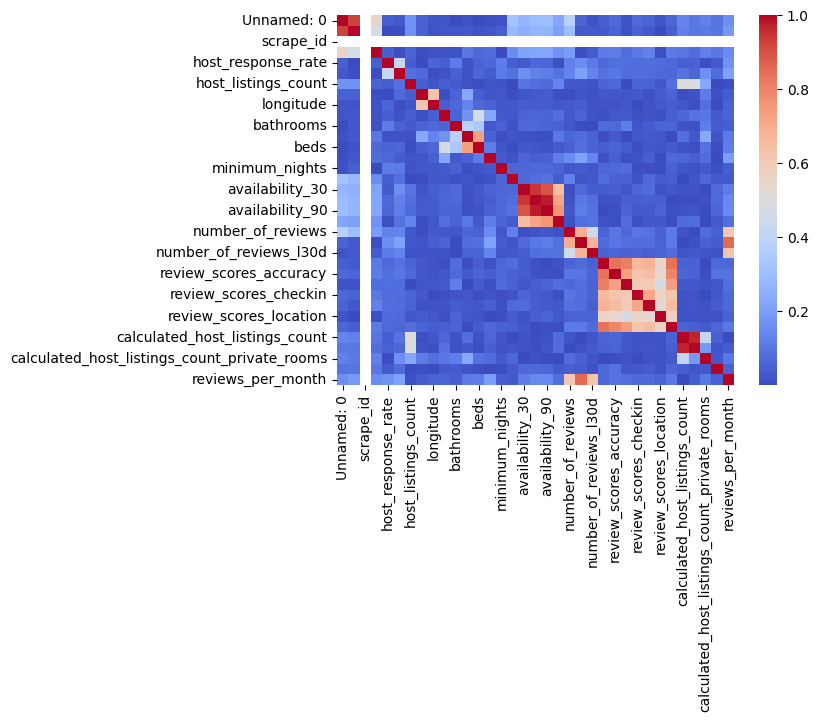

In [65]:
Heat_map=sns.heatmap(corr, cmap="coolwarm")
Heat_map

In [67]:
# Filtramos solo las columnas necesarias y eliminamos filas con valores nulos
data_private = private_room[['review_scores_location', 'review_scores_communication', 'review_scores_cleanliness']].dropna()

# Declaramos las variables dependientes e independientes
Vars_Indep = data_private[['review_scores_location', 'review_scores_communication']]
Var_Dep = data_private['review_scores_cleanliness']

# Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Corroboramos cuál es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación (R²):", coef_Deter)

# Corroboramos cuál es el coeficiente de correlación de nuestro modelo
import numpy as np
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación (R):", coef_Correl)


Coeficientes: [0.24690773 0.60370441]
Intercepto: 0.6684695893507877
Coeficiente de determinación (R²): 0.3960656337584577
Coeficiente de correlación (R): 0.6293374561858349


In [68]:
#Eliminar columnas de tipo string
shared_room_num=shared_room.select_dtypes(include=['float64', 'int64','float','int'])
filtro=shared_room[["host_acceptance_rate", "host_response_rate","review_scores_location", "review_scores_cleanliness", "price", 
                    "number_of_reviews", "availability_365", "reviews_per_month", "review_scores_communication"]]


#Mapa de calor

Corr_factors=shared_room_num.corr()
Corr_factors_abosluto=abs(Corr_factors)
corr=abs(shared_room_num.corr())

Corr_factors_abosluto

,Unnamed: 0,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Unnamed: 0,1.000000,0.954777,NaN,0.770851,0.097708,0.014928,0.477410,0.285061,0.044087,0.266434,...,0.117038,0.039340,0.159034,0.095695,0.161145,0.542511,0.030197,0.260189,0.562806,0.002600
id,0.954777,1.000000,NaN,0.791090,0.088556,0.027123,0.480018,0.333619,0.021262,0.202884,...,0.113884,0.053207,0.160344,0.111968,0.162865,0.543940,0.012673,0.271887,0.566590,0.002645
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.770851,0.791090,NaN,1.000000,0.087750,0.024027,0.421935,0.274434,0.068760,0.165596,...,0.152666,0.032769,0.143077,0.062811,0.172712,0.533518,0.158869,0.162561,0.604514,0.033790
host_response_rate,0.097708,0.088556,NaN,0.087750,1.000000,0.386784,0.269955,0.017220,0.005733,0.208583,...,0.259744,0.318567,0.233048,0.157571,0.173973,0.315877,0.041261,0.214875,0.309243,0.040084
host_acceptance_rate,0.014928,0.027123,NaN,0.024027,0.386784,1.000000,0.112649,0.065334,0.200621,0.217403,...,0.257589,0.229444,0.133150,0.204114,0.120046,0.183727,0.047495,0.198019,0.173850,0.272714
host_listings_count,0.477410,0.480018,NaN,0.421935,0.269955,0.112649,1.000000,0.034463,0.180937,0.327720,...,0.037098,0.061324,0.078708,0.035910,0.087019,0.874901,0.519567,0.568438,0.802206,0.102813
latitude,0.285061,0.333619,NaN,0.274434,0.017220,0.065334,0.034463,1.000000,0.770096,0.165085,...,0.105446,0.161501,0.077584,0.046251,0.022239,0.031045,0.035609,0.005577,0.050563,0.087488
longitude,0.044087,0.021262,NaN,0.068760,0.005733,0.200621,0.180937,0.770096,1.000000,0.272059,...,0.127775,0.142650,0.133756,0.096528,0.074131,0.248878,0.067640,0.224592,0.228523,0.043354
accommodates,0.266434,0.202884,NaN,0.165596,0.208583,0.217403,0.327720,0.165085,0.272059,1.000000,...,0.142833,0.038746,0.070271,0.073368,0.068385,0.373330,0.001601,0.290999,0.352723,0.036700


<Axes: >

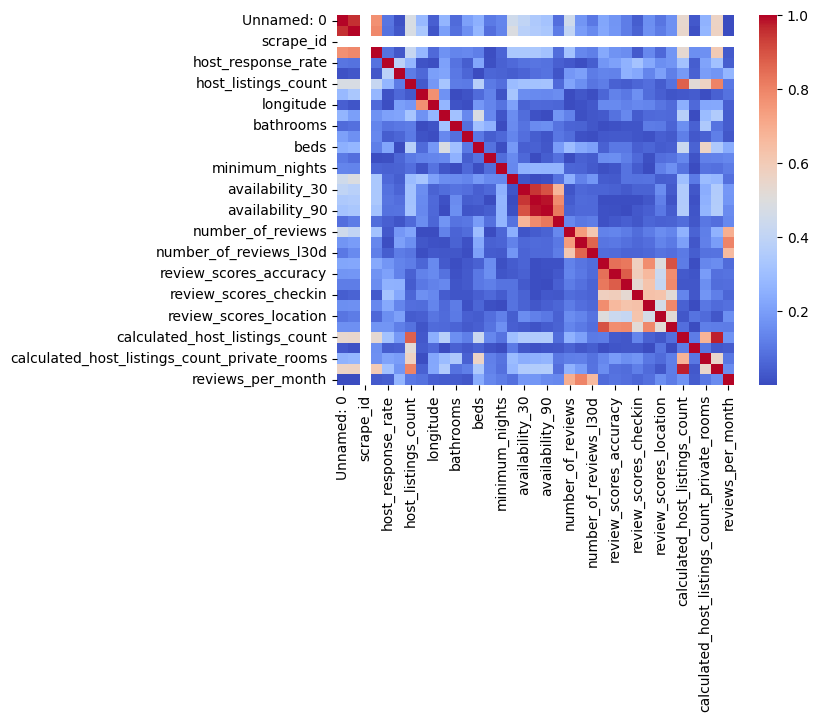

In [69]:
Heat_map=sns.heatmap(corr, cmap="coolwarm")
Heat_map

In [72]:
# Eliminamos filas con valores nulos en las columnas utilizadas
data_shared = shared_room[['review_scores_cleanliness', 'review_scores_communication', 'reviews_per_month']].dropna()

# Declaramos las variables dependientes e independientes
Vars_Indep = data_shared[['review_scores_cleanliness', 'review_scores_communication']]
Var_Dep = data_shared['reviews_per_month']

# Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Corroboramos cuál es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación (R²):", coef_Deter)

# Corroboramos cuál es el coeficiente de correlación de nuestro modelo
import numpy as np
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación (R):", coef_Correl)


Coeficientes: [0.08601022 0.14427492]
Intercepto: -0.06522189994587535
Coeficiente de determinación (R²): 0.008258320405299502
Coeficiente de correlación (R): 0.09087530140417419


In [74]:
#Eliminar columnas de tipo string
hotel_room_num=hotel_room.select_dtypes(include=['float64', 'int64','float','int'])
filtro=hotel_room[["host_acceptance_rate", "host_response_rate","review_scores_location", "review_scores_cleanliness", "price", 
                    "number_of_reviews", "availability_365", "reviews_per_month", "review_scores_communication"]]


#Mapa de calor

Corr_factors=hotel_room_num.corr()
Corr_factors_abosluto=abs(Corr_factors)
corr=abs(hotel_room_num.corr())

Corr_factors_abosluto

,Unnamed: 0,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Unnamed: 0,1.000000,0.921732,NaN,0.835512,0.171844,0.037333,0.922129,0.081406,0.033616,0.099367,...,0.137558,0.203553,0.122319,0.049457,0.031066,0.636007,0.068409,0.140334,0.165686,0.228813
id,0.921732,1.000000,NaN,0.749288,0.179891,0.033987,0.999931,0.057910,0.061270,0.109346,...,0.140022,0.103368,0.115037,0.097312,0.064350,0.663649,0.063545,0.136308,0.084826,0.042169
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.835512,0.749288,NaN,1.000000,0.058575,0.010953,0.749923,0.121509,0.030572,0.249412,...,0.167272,0.214334,0.141495,0.055034,0.121533,0.510343,0.069417,0.052833,0.112358,0.032621
host_response_rate,0.171844,0.179891,NaN,0.058575,1.000000,0.227630,0.181243,0.222215,0.240716,0.139799,...,0.138382,0.237009,0.096848,0.249344,0.031203,0.246793,0.098408,0.181867,0.056366,0.138417
host_acceptance_rate,0.037333,0.033987,NaN,0.010953,0.227630,1.000000,0.033080,0.114716,0.114275,0.162476,...,0.321458,0.245765,0.142554,0.214565,0.049800,0.033725,0.000279,0.067968,0.029317,0.121813
host_listings_count,0.922129,0.999931,NaN,0.749923,0.181243,0.033080,1.000000,0.058859,0.060367,0.108708,...,0.136625,0.105338,0.116383,0.096270,0.066463,0.672133,0.057974,0.133335,0.080296,0.045623
latitude,0.081406,0.057910,NaN,0.121509,0.222215,0.114716,0.058859,1.000000,0.906019,0.113321,...,0.008114,0.224188,0.092647,0.269919,0.082897,0.098817,0.003304,0.252453,0.495590,0.085293
longitude,0.033616,0.061270,NaN,0.030572,0.240716,0.114275,0.060367,0.906019,1.000000,0.101779,...,0.089815,0.228386,0.124369,0.260501,0.046486,0.030000,0.007417,0.369507,0.288796,0.098382
accommodates,0.099367,0.109346,NaN,0.249412,0.139799,0.162476,0.108708,0.113321,0.101779,1.000000,...,0.079592,0.098246,0.129385,0.188654,0.240642,0.035335,0.033933,0.163319,0.120245,0.079652


<Axes: >

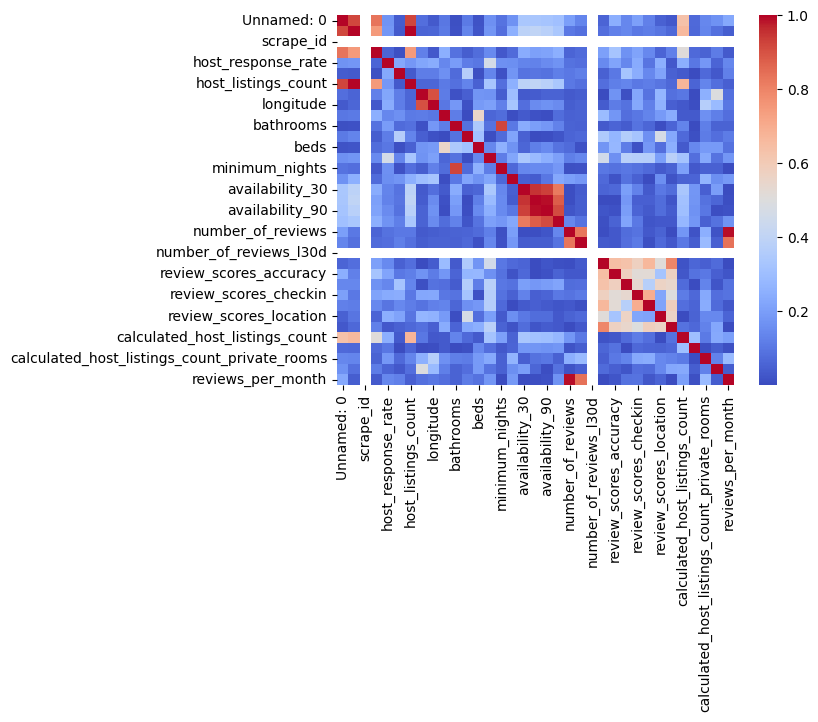

In [75]:
Heat_map=sns.heatmap(corr, cmap="coolwarm")
Heat_map

In [78]:
# Eliminamos filas con valores nulos en las columnas utilizadas
data_hotel = hotel_room[['review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'reviews_per_month']].dropna()

# Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep = data_hotel[['review_scores_cleanliness', 'review_scores_communication', 'review_scores_location']]
Var_Dep = data_hotel['reviews_per_month']

# Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Corroboramos cuál es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación (R²):", coef_Deter)

# Corroboramos cuál es el coeficiente de correlación de nuestro modelo
import numpy as np
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación (R):", coef_Correl)


Coeficientes: [-0.19668052  0.00806521  0.12328221]
Intercepto: 0.5040390815212241
Coeficiente de determinación (R²): 0.023745226045192136
Coeficiente de correlación (R): 0.15409486054113594


**Crear el mejor modelo de regression lineal multiple para cada variable cuantitativa: (host_id, host_acceptance_rate, host_is_superhost, host_total_listings_count, room_type, accommodates, bedrooms, Price, review_scores_value y reviews_per_month), y comparar los coeficientes obtenidos en estos modelos con respecto a los coeficientes obtenidos en el mapa de calor.**

In [80]:
# Cargar el archivo
Porto = pd.read_csv("PortoPortugal_50.csv", index_col=0)

# Conversión segura de la columna 'host_is_superhost'
Porto['host_is_superhost_num'] = Porto['host_is_superhost'].astype(str)
Porto['host_is_superhost_num'] = Porto['host_is_superhost_num'].str.replace('f', '0')
Porto['host_is_superhost_num'] = Porto['host_is_superhost_num'].str.replace('t', '1')
Porto['host_is_superhost_num'] = Porto['host_is_superhost_num'].str.replace('Sin regis1ro', '2')

# Rellenar valores faltantes antes de convertir
Porto['host_is_superhost_num'] = Porto['host_is_superhost_num'].replace('nan', '2')  # o el valor que consideres adecuado
Porto['host_is_superhost_num'] = Porto['host_is_superhost_num'].astype(int)

# Procesamiento de 'room_type'
frecuencias = Porto['room_type'].value_counts()
mapeo_numeros = {nombre: i + 1 for i, (nombre, count) in enumerate(frecuencias.items())}
Porto['room_type_num'] = Porto['room_type'].map(mapeo_numeros)
Porto['room_type_num'] = Porto['room_type_num'].fillna(0).astype(int)

# Eliminar columnas tipo string
dataframe_numerico = Porto.select_dtypes(include=['float64', 'int64', 'float', 'int'])

# Mapa de calor
Corr_factors = dataframe_numerico.corr()
Corr_factors_abosluto = abs(Corr_factors)

# Mostrar matriz de correlaciones absolutas
Corr_factors_abosluto


,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost_num,room_type_num
id,1.000000,NaN,0.460695,0.006603,0.009506,0.147431,0.046665,0.013324,0.049795,0.014087,...,0.101452,0.089053,0.108728,0.163999,0.154179,0.128031,0.121634,0.135545,0.065564,0.022975
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.460695,NaN,1.000000,0.026786,0.000937,0.118971,0.029930,0.029121,0.088309,0.019892,...,0.130015,0.076620,0.109711,0.208842,0.218508,0.072471,0.136020,0.103453,0.129948,0.066906
host_response_rate,0.006603,NaN,0.026786,1.000000,0.439236,0.037123,0.031009,0.033388,0.009348,0.046634,...,0.082238,0.065142,0.063877,0.061197,0.067080,0.036914,0.013801,0.134349,0.146375,0.116837
host_acceptance_rate,0.009506,NaN,0.000937,0.439236,1.000000,0.071199,0.054012,0.001481,0.011931,0.037540,...,0.065384,0.081003,0.059133,0.091388,0.100722,0.012415,0.121519,0.195655,0.180158,0.178944
host_listings_count,0.147431,NaN,0.118971,0.037123,0.071199,1.000000,0.003523,0.019936,0.039574,0.019058,...,0.077573,0.029605,0.088041,0.633786,0.630306,0.340506,0.010030,0.015510,0.086269,0.031834
latitude,0.046665,NaN,0.029930,0.031009,0.054012,0.003523,1.000000,0.657872,0.011318,0.007513,...,0.006597,0.018357,0.034993,0.017379,0.015911,0.028084,0.009423,0.036242,0.027363,0.013262
longitude,0.013324,NaN,0.029121,0.033388,0.001481,0.019936,0.657872,1.000000,0.053281,0.065282,...,0.012942,0.034979,0.032346,0.000048,0.002348,0.021189,0.005841,0.000879,0.011468,0.010206
accommodates,0.049795,NaN,0.088309,0.009348,0.011931,0.039574,0.011318,0.053281,1.000000,0.594405,...,0.028056,0.025989,0.014787,0.073474,0.092344,0.097062,0.104674,0.059149,0.000487,0.291700
bathrooms,0.014087,NaN,0.019892,0.046634,0.037540,0.019058,0.007513,0.065282,0.594405,1.000000,...,0.002541,0.050665,0.012705,0.039648,0.033717,0.050949,0.063799,0.078892,0.013360,0.025395


<Axes: >

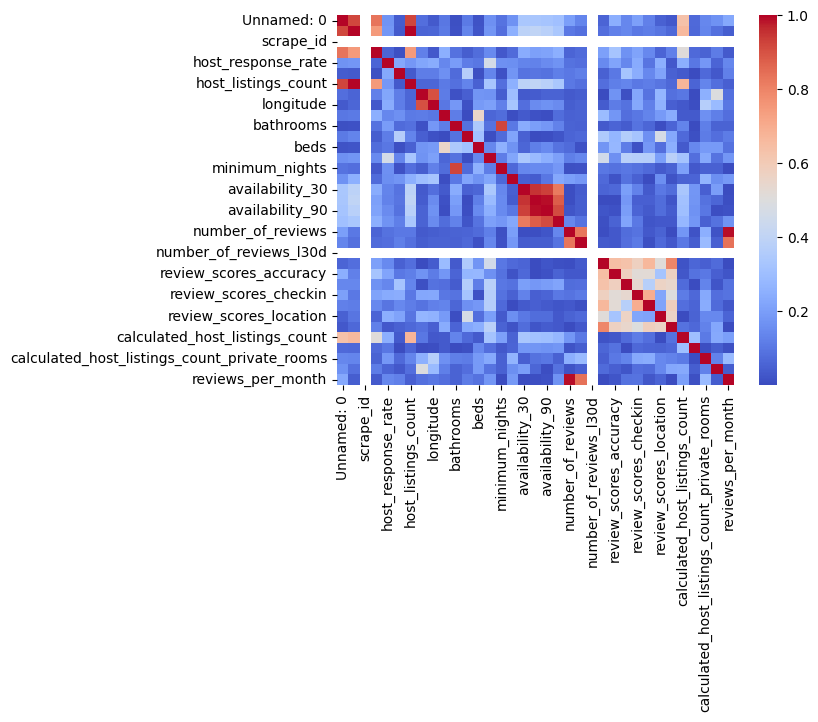

In [81]:
Heat_map=sns.heatmap(corr, cmap="coolwarm")
Heat_map

In [84]:
# Selección de variables
Vars_Indep = Porto[['host_acceptance_rate', 'calculated_host_listings_count_entire_homes']]
Var_Dep = Porto['host_response_rate']

# Combinar X e y para eliminar filas con NaN en cualquiera de ellas
datos_regresion = pd.concat([Vars_Indep, Var_Dep], axis=1).dropna()

# Separar X e y ya sin nulos
X = datos_regresion[['host_acceptance_rate', 'calculated_host_listings_count_entire_homes']]
y = datos_regresion['host_response_rate']

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X=X, y=y)

# Verificar coeficientes del modelo
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Calcular y mostrar el coeficiente de determinación y correlación
coef_Deter = model.score(X=X, y=y)
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de determinación:", coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

Coeficientes: [3.61406776e-01 4.68153349e-05]
Intercepto: 0.627466700977533
Coeficiente de determinación: 0.1934618258237738
Coeficiente de correlación: 0.43984295586467426


In [91]:
#Selección de variables
Vars_Indep = Porto[['host_acceptance_rate', 'calculated_host_listings_count_entire_homes']]
Var_Dep = Porto['host_response_rate']

# Eliminar filas con NaN en las variables usadas
datos_limpios = pd.concat([Vars_Indep, Var_Dep], axis=1).dropna()

# Redefinir las variables ya sin NaN
X = datos_limpios[['host_acceptance_rate', 'calculated_host_listings_count_entire_homes']]
y = datos_limpios['host_response_rate']

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X=X, y=y)

# Mostrar coeficientes e intercepto
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Calcular coeficiente de determinación y de correlación
coef_Deter = model.score(X=X, y=y)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de determinación (R²):", coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

Coeficientes: [3.61406776e-01 4.68153349e-05]
Intercepto: 0.627466700977533
Coeficiente de determinación (R²): 0.1934618258237738
Coeficiente de correlación: 0.43984295586467426


In [92]:
# Selección de variables
Vars_Indep = Porto[['host_response_rate', "number_of_reviews_ltm"]]
Var_Dep = Porto['host_acceptance_rate']

# Eliminar filas con NaN en las variables utilizadas
datos_limpios = pd.concat([Vars_Indep, Var_Dep], axis=1).dropna()

# Redefinir variables limpias
X = datos_limpios[['host_response_rate', "number_of_reviews_ltm"]]
y = datos_limpios['host_acceptance_rate']

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X=X, y=y)

# Mostrar coeficientes e intercepto
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Calcular el coeficiente de determinación y correlación
coef_Deter = model.score(X=X, y=y)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de determinación (R²):", coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

Coeficientes: [0.50842813 0.00087601]
Intercepto: 0.44765916661313554
Coeficiente de determinación (R²): 0.21107728741636655
Coeficiente de correlación: 0.45943148283108176


In [93]:
# Variables independientes y dependiente
Vars_Indep = Porto[['number_of_reviews_ltm', "host_acceptance_rate"]]
Var_Dep = Porto['host_is_superhost_num']

# Eliminar filas con valores faltantes en las columnas relevantes
datos_limpios = pd.concat([Vars_Indep, Var_Dep], axis=1).dropna()

# Redefinir X e y con los datos limpios
X = datos_limpios[['number_of_reviews_ltm', "host_acceptance_rate"]]
y = datos_limpios['host_is_superhost_num']

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X=X, y=y)

# Coeficientes del modelo
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Coeficiente de determinación y correlación
coef_Deter = model.score(X=X, y=y)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de determinación (R²):", coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

Coeficientes: [0.00625969 0.49047337]
Intercepto: -0.09806673839455671
Coeficiente de determinación (R²): 0.08001981447221784
Coeficiente de correlación: 0.2828777376751621


In [111]:
# Selección de variables
Vars_Indep = Porto[['minimum_nights', 'availability_365']]
Var_Dep = Porto['host_listings_count']

# Eliminar filas con NaN en las variables utilizadas
datos_limpios = pd.concat([Vars_Indep, Var_Dep], axis=1).dropna()

# Redefinir variables limpias
X = datos_limpios[['minimum_nights', 'availability_365']]
y = datos_limpios['host_listings_count']

# Crear y ajustar el modelo
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X=X, y=y)

# Mostrar coeficientes e intercepto
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Calcular el coeficiente de determinación y correlación
coef_Deter = model.score(X=X, y=y)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de determinación (R²):", coef_Deter)
print("Coeficiente de correlación:", coef_Correl)


Coeficientes: [-0.04931474  0.1086771 ]
Intercepto: 10.959575039125188
Coeficiente de determinación (R²): 0.01599909771301411
Coeficiente de correlación: 0.12648753975397778


In [110]:
# Selección de variables
Vars_Indep = Porto[['calculated_host_listings_count_private_rooms', 'accommodates']]
Var_Dep = Porto['room_type_num']

# Eliminar filas con NaN en las variables utilizadas
datos_limpios = pd.concat([Vars_Indep, Var_Dep], axis=1).dropna()

# Redefinir variables limpias
X = datos_limpios[['calculated_host_listings_count_private_rooms', 'accommodates']]
y = datos_limpios['room_type_num']

# Crear y ajustar el modelo
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X=X, y=y)

# Mostrar coeficientes e intercepto
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Calcular el coeficiente de determinación y correlación
coef_Deter = model.score(X=X, y=y)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de determinación (R²):", coef_Deter)
print("Coeficiente de correlación:", coef_Correl)


Coeficientes: [ 0.02580208 -0.0638765 ]
Intercepto: 1.4079483541519906
Coeficiente de determinación (R²): 0.15176107409720763
Coeficiente de correlación: 0.38956523728023734


In [105]:
# Selección de variables
Vars_Indep = Porto[['bathrooms', 'beds']]
Var_Dep = Porto['accommodates']

# Eliminar filas con NaN en las variables utilizadas
datos_limpios = pd.concat([Vars_Indep, Var_Dep], axis=1).dropna()

# Redefinir variables limpias
X = datos_limpios[['bathrooms', 'beds']]
y = datos_limpios['accommodates']

# Crear y ajustar el modelo
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X=X, y=y)

# Mostrar coeficientes e intercepto
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Calcular el coeficiente de determinación y correlación
coef_Deter = model.score(X=X, y=y)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de determinación (R²):", coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

Coeficientes: [0.61622213 0.76222398]
Intercepto: 1.1358100662262847
Coeficiente de determinación (R²): 0.6074524367894315
Coeficiente de correlación: 0.7793923509949475


In [114]:
# Selección de variables
Vars_Indep = Porto[['bathrooms', 'accommodates']]
Var_Dep = Porto['bedrooms']

# Eliminar filas con NaN en las variables utilizadas
datos_limpios = pd.concat([Vars_Indep, Var_Dep], axis=1).dropna()

# Redefinir variables limpias
X = datos_limpios[['bathrooms', 'accommodates']]
y = datos_limpios['bedrooms']

model = LinearRegression()
model.fit(X=X, y=y)

# Mostrar coeficientes e intercepto
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Calcular el coeficiente de determinación y correlación
coef_Deter = model.score(X=X, y=y)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de determinación (R²):", coef_Deter)
print("Coeficiente de correlación:", coef_Correl)


Coeficientes: [0.45809103 0.29202286]
Intercepto: -0.28769112981368816
Coeficiente de determinación (R²): 0.6350714341026552
Coeficiente de correlación: 0.7969136930073766


In [115]:
# Selección de variables
Vars_Indep = Porto[['bedrooms', 'accommodates']]
Var_Dep = Porto['price']

# Eliminar filas con NaN en las variables utilizadas
datos_limpios = pd.concat([Vars_Indep, Var_Dep], axis=1).dropna()

# Redefinir variables limpias
X = datos_limpios[['bedrooms', 'accommodates']]
y = datos_limpios['price']

# Crear y ajustar el modelo
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X=X, y=y)

# Mostrar coeficientes e intercepto
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Calcular el coeficiente de determinación y correlación
coef_Deter = model.score(X=X, y=y)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de determinación (R²):", coef_Deter)
print("Coeficiente de correlación:", coef_Correl)


Coeficientes: [20.51416322 13.70380754]
Intercepto: 9.038356475411632
Coeficiente de determinación (R²): 0.09064711829145256
Coeficiente de correlación: 0.301076598711113


In [116]:
# Selección de variables
Vars_Indep = Porto[['review_scores_rating', "review_scores_accuracy"]]
Var_Dep = Porto['review_scores_value']

# Eliminar filas con NaN en las variables utilizadas
datos_limpios = pd.concat([Vars_Indep, Var_Dep], axis=1).dropna()

# Redefinir variables limpias
X = datos_limpios[['review_scores_rating', "review_scores_accuracy"]]
y = datos_limpios['review_scores_value']

# Crear y ajustar el modelo
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X=X, y=y)

# Mostrar coeficientes e intercepto
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Calcular el coeficiente de determinación y correlación
coef_Deter = model.score(X=X, y=y)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de determinación (R²):", coef_Deter)
print("Coeficiente de correlación:", coef_Correl)


Coeficientes: [0.56742386 0.37559395]
Intercepto: 0.19081113344571587
Coeficiente de determinación (R²): 0.7341428067995523
Coeficiente de correlación: 0.8568213389030133


In [117]:
# Selección de variables
Vars_Indep= Porto[['number_of_reviews_ltm', "number_of_reviews_l30d"]]
Var_Dep= Porto['reviews_per_month']

# Eliminar filas con NaN en las variables utilizadas
datos_limpios = pd.concat([Vars_Indep, Var_Dep], axis=1).dropna()

# Redefinir variables limpias
X = datos_limpios[['number_of_reviews_ltm', "number_of_reviews_l30d"]]
y = datos_limpios['reviews_per_month']

# Crear y ajustar el modelo
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X=X, y=y)

# Mostrar coeficientes e intercepto
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Calcular el coeficiente de determinación y correlación
coef_Deter = model.score(X=X, y=y)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de determinación (R²):", coef_Deter)
print("Coeficiente de correlación:", coef_Correl)


Coeficientes: [0.06326853 0.10677065]
Intercepto: 0.47334945599659517
Coeficiente de determinación (R²): 0.7810791842731332
Coeficiente de correlación: 0.8837868432337818


## Conclusión del Análisis
En la presente actividad se desarrolló un modelo de regresión lineal múltiple con el propósito de analizar la influencia de determinadas calificaciones otorgadas por los huéspedes —específicamente, review_scores_location y review_scores_communication— sobre la percepción de review_scores_cleanliness en alojamientos clasificados como "Entire home/apt" enel archiovo de airbnb de Porto, Portugal.

Previamente a la construcción del modelo, se llevó a cabo un exhaustivo proceso de limpieza de datos, que incluyó:

Eliminación de columnas irrelevantes o redundantes.

Conversión de variables a formatos numéricos adecuados.

Detección y eliminación de valores atípicos mediante el rango intercuartílico (IQR).

Exclusión de registros con valores nulos en las variables seleccionadas.

Una vez preparados los datos, se procedió al ajuste del modelo utilizando la técnica de regresión lineal, obteniéndose los coeficientes correspondientes para cada variable independiente, así como el intercepto del modelo.

El desempeño del modelo fue evaluado mediante dos métricas estadísticas:

Coeficiente de determinación (R²): permitió cuantificar la proporción de la variabilidad en la variable dependiente (cleanliness) explicada por las variables independientes.

Coeficiente de correlación (R): proporcionó una medida de la fuerza y dirección de la relación entre las variables.